In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [ ]:
# Load the Wine dataset
x = np.load("wineData.npy" , "r");
y = np.load("wineLabels.npy" , "r");

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.50, random_state=0)

# Standardize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

Accuracy: 97.75%


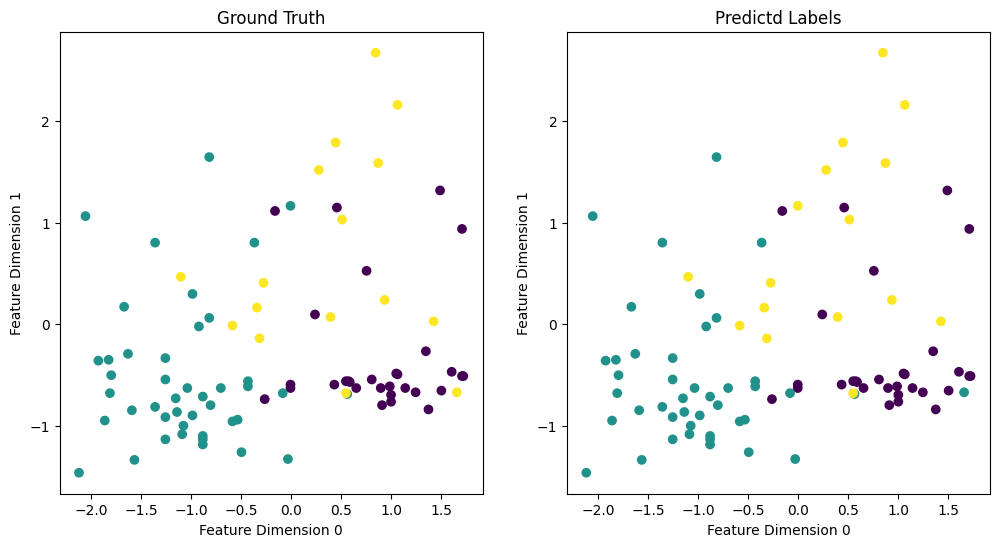

In [ ]:
# Create and train a multiclass SVM
svm_model = SVC(C=1.0, kernel='rbf', gamma='scale')  # You can adjust hyperparameters here
svm_model.fit(train_data, train_labels)

# Predict labels for the testing set
pred_labels = svm_model.predict(test_data)

# Report the accuracy of your model
accuracy = accuracy_score(test_labels, pred_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualize the test data using a scatter plot
plt.figure(figsize=(12, 6))

# Plot ground truth labels
plt.subplot(1, 2, 1)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap='viridis')
plt.title('Ground Truth')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')

# Plot predicted labels
plt.subplot(1, 2, 2)
plt.scatter(test_data[:, 0], test_data[:, 1], c=pred_labels, cmap='viridis')
plt.title('Predictd Labels')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')

plt.show()

Task 4.2

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.50, random_state=0)

# Standardize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

3/3 [==============================] - 0s 7ms/step - loss: 0.1140 - accuracy: 0.9663
Accuracy: 97.75%
3/3 [==============================] - 0s 4ms/step


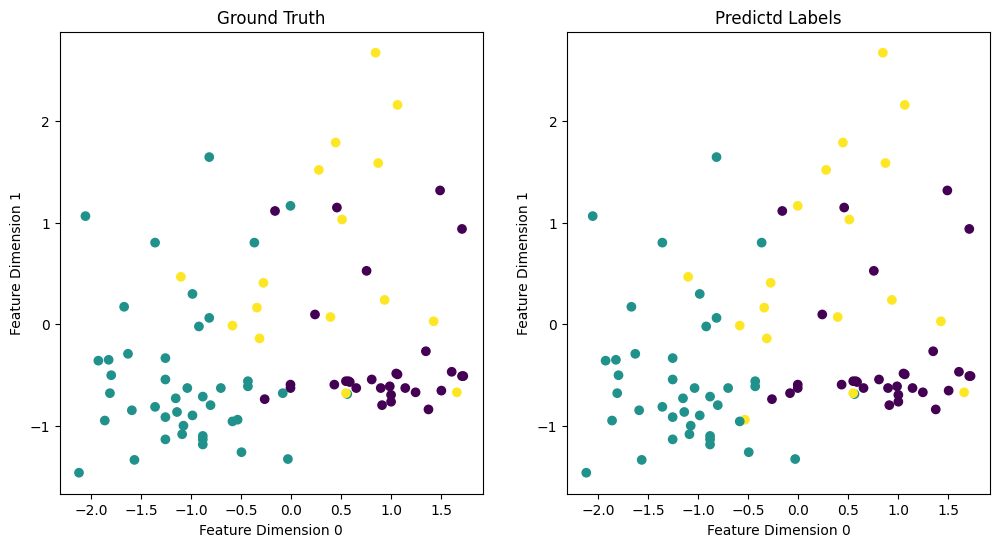

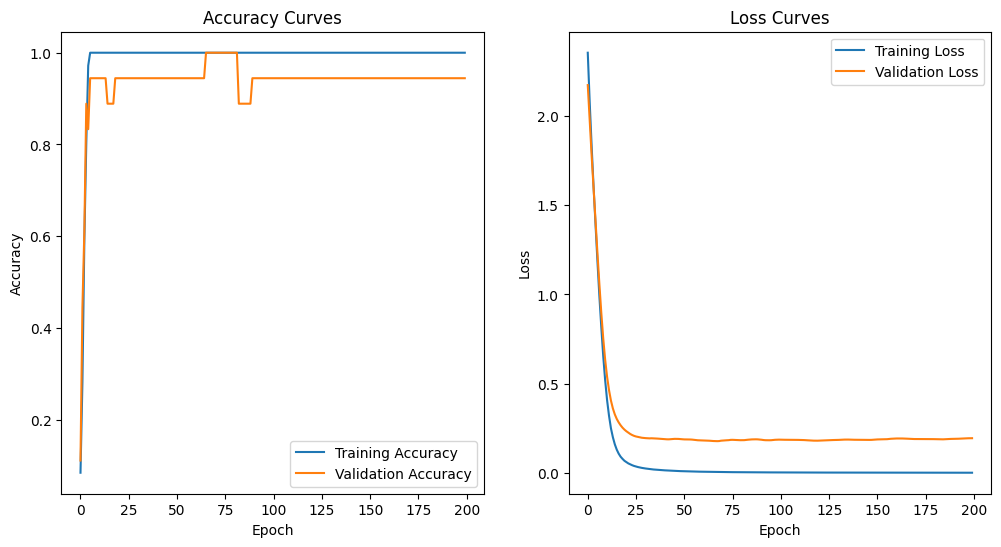

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Assuming you have 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(train_data, train_labels, epochs=200, batch_size=32, validation_split=0.2,verbose=0)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Make predictions on the test set
y_pred_probabilities = model.predict(test_data)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Plot Ground Truth vs. Neural Network predictions
plt.figure(figsize=(12, 6))

# Plot Ground Truth
plt.subplot(1, 2, 1)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap='viridis')
plt.title('Ground Truth')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')

# Plot Neural Network Predictions
plt.subplot(1, 2, 2)
plt.scatter(test_data[:, 0], test_data[:, 1], c=y_pred, cmap='viridis')
plt.title('Predictd Labels')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')

plt.show()

# Plot Neural Network training curves
plt.figure(figsize=(12, 6))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Task 4.3

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2649 - accuracy: 0.9230 - val_loss: 0.1416 - val_accuracy: 0.9584
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1143 - accuracy: 0.9657 - val_loss: 0.1210 - val_accuracy: 0.9653
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0812 - accuracy: 0.9750 - val_loss: 0.0987 - val_accuracy: 0.9722
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0588 - accuracy: 0.9812 - val_loss: 0.0985 - val_accuracy: 0.9701
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0443 - accuracy: 0.9857 - val_loss: 0.0951 - val_accuracy: 0.9728
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0367 - accuracy: 0.9877 - val_loss: 0.0931 - val_accuracy: 0.9751
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0294 - accuracy: 0.9899 - val_loss: 0.0943 - val_accuracy

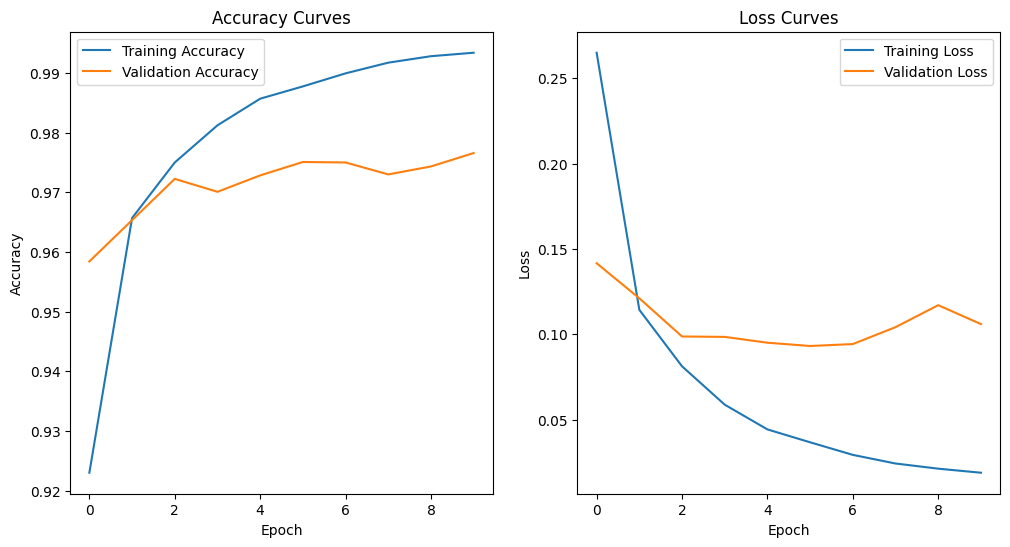

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data
train_images = np.reshape(train_images, (60000, 784)) / 255.0
test_images = np.reshape(test_images, (10000, 784)) / 255.0

# Define the model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming you have 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot training curves
plt.figure(figsize=(12, 6))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Task 4.4

Epoch 1/10
1500/1500 [==============================] - 52s 34ms/step - loss: 0.1452 - accuracy: 0.9545 - val_loss: 0.0599 - val_accuracy: 0.9825
Epoch 2/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0471 - accuracy: 0.9851 - val_loss: 0.0490 - val_accuracy: 0.9855
Epoch 3/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.0315 - accuracy: 0.9897 - val_loss: 0.0478 - val_accuracy: 0.9848
Epoch 4/10
1500/1500 [==============================] - 53s 35ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0385 - val_accuracy: 0.9890
Epoch 5/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0406 - val_accuracy: 0.9891
Epoch 6/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0426 - val_accuracy: 0.9889
Epoch 7/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.0515 -

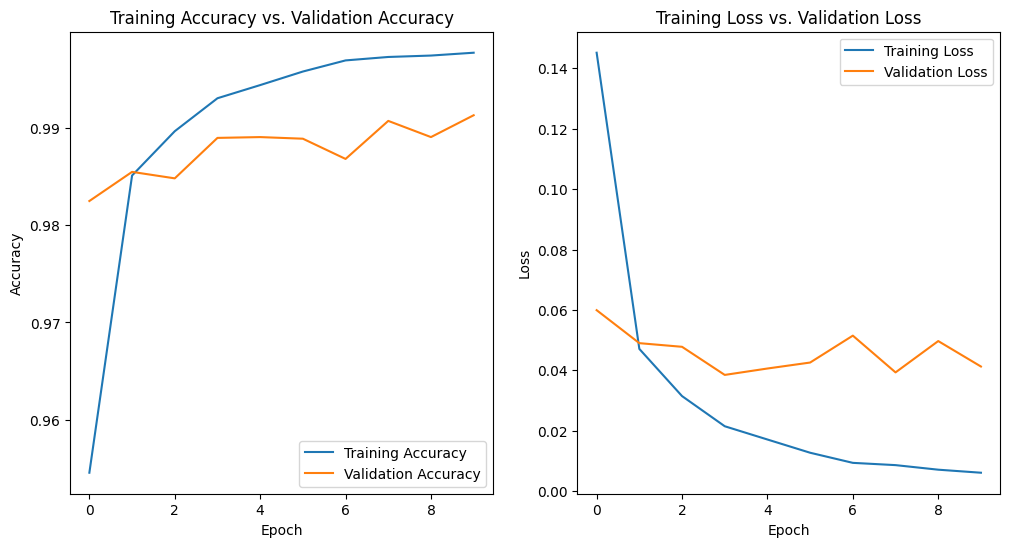

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Add a channel dimension to the data
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming you have 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot training curves
plt.figure(figsize=(12, 6))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
